# Дз 3. Тестирование статистических гипотез

<div class="alert alert-info" role="alert">

Важно!

* Плагиат карается обнулением работы
* При использовании чужого кода из открытых источников необходимо указать ссылку на источник
* В каждой задаче необходимо обосновывать выбор статистического критерия, формулировать нулевую и альтернативную гипотезу и делать интерпретацию получившихся результатов, а также содержательный вывод.
* Весь текст оформляется строго в ячейках типа markdown

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels as sm
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
import scipy

## Задача 1. Осьминог Пауль (2 балла)


В период с 2008 по 2010 год в Германии жил Осьминог Пауль, который был известен тем, что мог предсказывать результаты матчей с участием сборной Германии.     
   
В таблице ниже вы можете видеть результаты его предсказаний: 


<a href="https://ibb.co/VWnc5yG"><img src="https://i.ibb.co/QFS3tBV/image.jpg" alt="image" border="0"></a>

Если считать, что случайным образом мы угадывали ли бы 50% матчей, то можно ли утверждать, что осьминог Пауль был талантливым экстрасенсом со способностями к предсказаниям?

Предположим, что осьминог выбирает наугад, тогда:

Гипотеза Н0: осьминог угадывает наугад   ->   p = 1/2  (исходы : угадал/не угадал). Данная величина имеет распределение Бернулли

Гипотеза Н1:

 а) Осьминог угадывает не наугад  (двусторонняя)
 
 б) Осьминог угадывает лучше, чем наугад  (односторонняя)
 
 При решении задачи использовались конспекты семинара 6.


In [2]:
# Биномиальное распределение. рассматриваем двустороннюю альтернативную гипотезу.
p = 1/2    # вероятность выбрать наугад
n = 13     #кол-во матчей
F_H0 = stats.binom(n, 0.5)
stats.binom_test(11, 13, 0.5, alternative = 'two-sided')    # число 11 в формуле - это кол-во угадываний

0.0224609375

    Получилось, что при проверке двусторонней гипотезы p-value = 2.2%. Это значит, что на уровне значимости 1% мы не отвергаем Н0, но на уровнях выше, мы отвергаем Н0.

In [3]:
# Биномиальное распределение. рассматриваем одностороннюю альтернативную гипотезу.
stats.binom_test(11, 13, 0.5, alternative = 'greater')   

0.01123046875

    Получилось, что при проверке односторонне гипотезы p-value = 1.1%. Это значит, что на уровне значимости 1% мы не отвергаем Н0, но на уровнях выше, мы отвергаем Н0. Другими словами, мы отвергли гипотезу о том, что осьминог Пуаль угадывет исходы с вероятностью меньше, чем 0.5 (угадывает наугад). Значит, осьминог Пауль правильно угадывает исходы с вероятностью больше, чем 0.5 => осьминог угадывает лучше, чем наугад.

## Задача 2.  Корм и котики (2 балла)

    
Новый корм для котиков рекламируется с помощью рекламного баннера. Отдел маркетинга разработал для рекламы новый баннер. Они считают, что он более красивый. Перед фирмой возникла необходимость проверить какой из двух баннеров лучше.

Для этого была создана специальная веб-форма. В этой веб-форме людям по очереди демонстрировали оба баннера и просили поставить лайк, если баннер нравится человеку. Если человеку нравятся оба баннера, он может поставить два лайка. Если ему не нравится ни один баннер, он может не ставить лайки вовсе. Собранные в конечном итоге данные находятся в табличке.

Можно ли утверждать, что оба баннера одинаково хороши? Сформулируйте статистическую гипотезу для проверки того, что оба баннера выбирают одинаково часто. Проверьте ее и сделайте выводы.


In [2]:
df = pd.read_csv('banner_click_stat.csv', sep='\t') 
df.rename(columns={'0': 'Old_banner', '0.1': 'New_banner'}, inplace=True)
df.head()

,Old_banner,New_banner
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0


##### Этап 1: формулировка гипотезы
В задаче не дан уровень значимости, значит будем рассматривать уровень значимости равный 1%.

Строим гипотезу о том, что респонденты выбирают одинаково часто баннеры. Разность медиан обоих выборок должна будет равняться нулю (так как выборки должны быть равными). 

Проверяем гипотезу о том, совпадают ли медианы двух выборок:

Н0: mu = 0     <-- нулевая гипотеза о том, что разность медиан обоих выборок равна нулю  (то есть оба баннера выбирают одинаково часто)
 
Н1: mu != 0     <-- альтернативная гипотеза о том, что разность медиан обоих выборок не равна нулю (то есть оба баннера не выбирают одинаково часто)

Поскольку решается гипотеза о равенстве, то имеем друстороннюю область


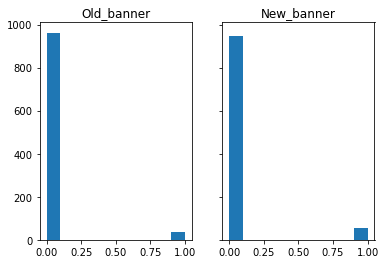

In [3]:
# Визуализируем таблицу
fig, ax = plt.subplots(1, 2, sharey = True)
ax[0].hist(df['Old_banner'])
ax[0].set_title('Old_banner')

ax[1].hist(df['New_banner'])
ax[1].set_title('New_banner')
plt.show()

##### Этап 2: визуальный анализ имеющихся данных. Выбор критерия. 
Мы имеем две выборки: Old_banner и New_banner. Эти выборки связанные, так как наблюдаемые значения были получены от одной и той же группы респондентов.  
Для связанных выборок существует несколько тестов: t-test – зависимые выборки(параметрический, ttest_rel()), Критерий Уилкоксона (непараметрический, wilcoxon()), Критерий Знаков (непараметрический, sign_test()).

В связи с тем, что у нас биноминальное распределение, то выбирать тест нужно среди непараметрических: wilcoxon или sign_test.

    wilcoxon () : используется для не больших выборок (до 50 наблюдаемых значений)
    sign_test() : используется для больших выборок (от 50 наблюдаемых значений)

Поскольку имеется 999 наблюдаемых значений, то есть большая выборка, то разумно использовать sign_test.

https://youtu.be/IcLSKko2tsg

In [4]:
#посмотрим, сколько всего ответов, в зависимости от того, какой вариант ответа был выбран респондентом
df.value_counts()

Old_banner  New_banner
0           0             939
1           1              30
0           1              23
1           0               7
dtype: int64

    Такми образом, мы имеем, что ни один банер не понравился 939 участникам опроса, 30 людям понравились оба баннера. 23 респондента сказали, что им понравился новый баннер, и только 7 чел. понравился старый баннер.
    На глаз видно, что оба баннера не нравятся респондентам. 

Однако есть один тонкий момет: из-за того, что надо решить одинаково ли часто проверяют баннеры, надо выкинуть повторяющиеся ответы респондентов. Дргуими словами, если респондент проголосовал за оба баннера , то его голос не считается, так как данный вариант ответа не влияет на показатель превосходства одного из баннеров. То есть нужно выкинуть парные ответы, и оставить только те, где респондент голосовал только за один баннер.

In [3]:
# Шаг 1. Выкинуть из данных голоса за оба баннера одновременно.
# создадим новую переменную. цифра 1 - респондент выбрал старый баннер. 2 - выбрал новый баннер. слово 'NaN' - ода понравились. слово 'NaN' - оба не понравились . 
def my_funk(x):
    if x.loc['Old_banner'] == x.loc['New_banner'] == 1:
        return 'NaN'
    elif x.loc['Old_banner'] == x.loc['New_banner'] == 0:    
        return 'NaN'   
    elif x.loc['Old_banner'] == 1:
        return 1
    elif x.loc['New_banner'] == 1:
        return 2

# Применим функцию
df['Banner'] = df[['Old_banner', 'New_banner']].apply(my_funk, axis=1)


In [4]:
# Шаг 2. удалим все строки со словом 'NaN'. 

df = df.set_index('Banner')
df = df.drop(['NaN'],axis = 0)

df.head()
df.value_counts()# теперь мы имееем 30 наблюдений, которые отражают распределение голосов только по одним банерам .

Old_banner  New_banner
0           1             23
1           0              7
dtype: int64

In [5]:
# Этап 3: Считаем отдельно по каждой из колонок, сколько мы имеем голосов за старый и сколько за новый баннеры.
print(df["Old_banner"].value_counts())
print(df["New_banner"].value_counts())


0    23
1     7
Name: Old_banner, dtype: int64
1    23
0     7
Name: New_banner, dtype: int64


    Главное отличие этого кода от того, что был написан выше, это то, что до этого мы смотрели количество соотношений по всей таблице: 0-0, 1-1, 0-1, 1-0, а сейчас смотрим сумманоре число 0 и 1 по каждой из колонок. 
    На данный момент видно, что в колонке Old_banner мы имеем 37 голосов за и 962 против. В колонке New_banner мы имеем 53 голоса за баннер и 946 против. То есть новый баннер людям нравился чаще, чем старый, такая же зависимость прослеживалась и в результатах вышеприведенного кода.  
    Для того, чтобы полностью согласиться или нет с данным утверждением протестируем гипотезу о том, что старый баннер выбирают также часто, как новый баннер 

In [10]:
# Этап 4: считаем критерий
from statsmodels.stats.descriptivestats import sign_test
sign_test(df['Old_banner']-df['New_banner'])

(-8.0, 0.005222879350185395)

    p-value = 0%    < 5%, 10%....
    Это говорит о том, что на  уровне значимости 1% Н0  отвергается. Таким образом, на выбранном ранее уровне значимости (1%) медианы обоих выборок не совпадают, а значит, баннеры выбирают не одинаково. 

In [12]:
# по распределению значений видно, что новый баннер выбирают чаще 
df.value_counts()

Old_banner  New_banner
0           1             23
1           0              7
dtype: int64

## Задача 3. Немного АВ-тестов (3 балла)
## Игра Cookie Cat

В этом задании мы поработаем с данными Cookie Cats - популярной игры-головоломки, которую разработала компания Tactile Entertainment. В этой игре игрок должен соединять одинаковые элементы в ряд, чтобы очистить поле и выиграть уровень. 

<p style="align: center;"><img align=center src="https://i.ytimg.com/vi/iPxZIp0cbJE/maxresdefault.jpg"  width=500></p>
 
 
<p style="align: center;"><img align=center src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/cc_gates.png"  width=500></p>


По мере прохождения уровней перед игроками появляются ворота, открытия которых нужно ждать какое-то время или пропускать их, совершая покупки в приложении. С точки зрения создателей эти ворота повышают интерес к игре и стимулируют к вложению денег в игру.


Но у создателей появляется важный вопрос: **где лучше всего ставить ворота?**
Первоначально первые ворота были размещены на уровне 30. Однако есть гипотеза, что лучше переместить их на уровень 40. В этом задании вам предлагается проанализировать результаты AB-теста, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. 

**Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.

* `version` - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - вернулся ли игрок в игру через 1 день после установки
* `retention_7` - вернулся ли игрок в игру через 7 дней после установки

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

In [ ]:
import pandas as pd
df = pd.read_csv('cookie_cats.csv')
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.shape

In [ ]:
df.version.unique()

Выводы:
1. Имеем 90 188 наблюдений
2. Пропущенных значений нет
3. Количественные переменные: userid и sum_gamerounds
4. Качественные переменные: version, retention_1 и retention_7

### Вопрос 1: есть ли зависимость между возвращаемостью игроков и расположением ворот?

#### 1.1 Проверьте гипотезу для возвращения через день

In [ ]:
# Проверим сколько всего в среднем игроков возвращаются в игру:
cr_znach = df['retention_1'].mean()
cr_znach

In [ ]:
# Проверим сколько в среднем по группам игроков возвращаются в игру:
a = df['retention_1'].groupby(df['version'])
b = df['retention_1'].groupby(df['version'])
returns_1st_day = a.sum()/b.count()
print(returns_1st_day)

Этап 1: Получается что в срднем около половины игроков позвращаются в игру после первого дня. Развделив всех по группам, стало видно, что игроки с gate_30 (старая версия игры) чаще возвращались в игру, чем игроки с gate_40  (новая версия).

Этап 2: проверим гипотезу о том, что игроки, играющие в старую версию возвращаются после первого дня чаще, чем игроки, играющие в новую версию игры. 

Тогда:

    Нулевая гипотеза: зависимость между версией игры и возвращением в игру после первого дня 
    Альтернативная гипотеза: нет зависимости между версией игры и возвращением в игру после первого дня 

Этап 3: Выбор критерия.

В связи с тем, что проверяется гипотеза о зависимости, то логичнее выбрать критерий независимости хи-квадрат Пирсона (непараметрический, chi2_contingency())

In [ ]:
#Строим таблицу сопряженности
t = df.groupby('version')['retention_1'].value_counts().unstack()     
print(t)

# Игроки с gate_30 вернулись в игру 20034 раза
# игроки с gate_40 вернулись в игру 20119 раз

In [ ]:
# Этап 4: считаем критерий
stats.chi2_contingency(t, correction=False)

Таким образом, мы имеем:
1. Значение статистики = 3.18
2. p-value = 7% 
3. Уровень значимости = 1

Н0 не отвергается на уровне значимости 1% (на 5% тоже). Значит игроки со старой версии игры (gate_30) возвращаются в игру после первого дня чаще, чем игроки с новой версией игры (gate_40).

#### 2.2 Проверьте гипотезу для возвращения через семь дней

In [ ]:
# Проверим сколько в среднем по группам игроков возвращаются в игру через 7 дней:
a = df['retention_7'].groupby(df['version'])
b = df['retention_7'].groupby(df['version'])
returns_7st_day = a.sum()/b.count()
print(returns_7st_day)

Нулевая гипотеза: зависимость между версией игры и возвращением в игру через семь дней

Альтернативная гипотеза: нет зависимости между версией игры и возвращением в игру через семь дней 

In [ ]:
# Проверка выполняется аналогино.
t2 = df.groupby('version')['retention_7'].value_counts().unstack()  
stats.chi2_contingency(t2, correction=False)

Таким образом, мы имеем:
1. Значение статистики = 10.013
2. p-value = 0.1% 
3. Уровень значимости = 1

Н0 отвергается на любом развумном уровне значимости. Значит игроки со старой версии игры (gate_30) возвращаются в игру через 7 дней чаще, чем игроки с новой версией игры (gate_40).

### Вопрос 2: Отличается ли среднее количество раундов в группах gate_40 и gate_30?

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
# Перед тем, как смотреть среднее число раундов, проверим имеются ли в данных выбросы. 
# Для этого визуализируем количество сыграных раундов через боксплот.

df.boxplot('sum_gamerounds')
plt.show()

График показывает, что есть выброс в районе значения 50000, все остальные наблюдения находятся значительно ниже - ниже 10000. Его нужно будет удалить, например, ручную. 

In [ ]:
df = df[(df['sum_gamerounds']<10000)] 
df.boxplot('sum_gamerounds')

Теперь стало детальнее видно, что основное число наблюдений находится ниже 500. Чтобы привести распределение к нормальному, можно логарифмировать.

In [ ]:
# логарифмируем
df['sum_gamerounds'] = np.log1p(df['sum_gamerounds'].values)

# посмотрим итог
df.boxplot('sum_gamerounds')
plt.show()

In [ ]:
# По графику boxplot видно,что распределение приблизилось к нормальному.
# Посмотрим опсительную статистику, чтобы убедиться в этом. 
df['sum_gamerounds'].describe()

После того, как были удалены выбросы логарифмированием, мы получили нормальное распределение, значит можно переходить к тестированию гипотезы. 

Определим гипотезы:

    Н0: среднее количество раундов в группах gate_30 равно среднему в группах gate_40
    Н1: среднее количество раундов в группах gate_30 не равно среднему в группах gate_40
    
Подведем нужную информацию, для того, чтобы выбрать тест:
1. Проверяем гипотезу о среднем 
2. Обе выборки независимые 
3. Большое число наблюдений

Значит используем параметрический z-тест о среднем для независимых выборок ( ztest() )

In [ ]:
from statsmodels.stats.weightstats import ztest 

In [ ]:
# Этап 1: сохранить в отдельные переменные выборки, с которыми будем работать.

a_gate_30 = df[df['version'] == 'gate_30']['sum_gamerounds']
b_gate_40 = df[df['version'] == 'gate_40']['sum_gamerounds']

# Этап 2: посчитать z-тест.
ztest(a_gate_30, b_gate_40, value=0)

Поскольку значение p-value = 7%, то на уровнях значимости 1%, 5% нулевая гипотеза не отвергается. Значит, среднее число раундов в группах одинаково. Посмотрим на графике так ли это.  

In [ ]:
# Этап 3. Проверка.

# Напишем функцию, которая построит две гистограммы на одной картинке. 
# Они будут показывать распределение данных по каждой из групп. 
# Там же на графике посмотрим где располагаются значения средних.  

def two_histograms_1(x, y):
    x.hist (alpha=0.5, weights=[1./len(x)]*len(x) )
    y.hist (alpha=0.5, weights=[1./len(y)]*len(y) )
    plt.axvline(x.mean(), color='red', alpha=0.8, linestyle='dashed')
    plt.axvline(y.mean(), color='blue', alpha=0.8, linestyle='dashed')
    plt.legend([x.name, y.name])
    
# Выведем рядом с графиком значения средних по группам
print(a_gate_30.mean(), b_gate_40.mean())
# Поситроим гимтаграммы по группам gate_30 и gate_40:
x = df[df['version'] == 'gate_30']['sum_gamerounds']
y = df[df['version'] == 'gate_40']['sum_gamerounds']
x.name, y.name = 'gate_30', 'gate_40'
two_histograms_1(x, y)

Получается, что значения средних близки к друг к другу, но все же немного отличаются.

### Вопрос 3: Отличается ли медианное количество раундов в группах gate_40 и gate_30?

Уже выше упоминалось о том, что у нас имеются независимые выборки.

Для них существует несколько тестов: 

    z-test (параметрический, о среднем: ztest())
    t-test (параметрический, о среднем: ttest_1samp() и ttest_ind(), о доле: proportions_ztest())
    критерий Манна-Уитни (непараметрический, сравнение медиан: mannwhitneyu())
В связи с тем, что проверяется гипотеза о медиане , то логичнее взять критерий Манна-Уитни.

Сформулируем гипотезу:

    Н0: медианное количество раундов в группе gate_30 равно медианному значению в группе gate_40
    Н1: медианное количество раундов в группе gate_30 не равно медианному значению в группе gate_40 

In [ ]:
# Этап 1: сохранить в отдельные переменные выборки, с которыми будем работать. Аналогично с прошлым пунктом.
a_gate_30 = df[df['version'] == 'gate_30']['sum_gamerounds']
b_gate_40 = df[df['version'] == 'gate_40']['sum_gamerounds']

# Этап 2: посчитаем для кадой группы медиану:

median_gate_30 = a_gate_30.median()
median_gate_40 = b_gate_40.median()
print(median_gate_30, median_gate_40)

# Этап 3: Изменим вышенаписанную функцию для построения гистограмм, так как там не показываются медианы. 
def two_histograms_2(x, y):
    x.hist (alpha=0.5, weights=[1./len(x)]*len(x) )
    y.hist (alpha=0.5, weights=[1./len(y)]*len(y) )
    plt.axvline(x.median(), color='red', alpha=0.8, linestyle='dashed')
    plt.axvline(y.median(), color='blue', alpha=0.8, linestyle='dashed')
    plt.legend([x.name, y.name])

# посмотрим на графике полученные значения:
a_gate_30.name, b_gate_40.name = 'gate_30', 'gate_40'
two_histograms_2(a_gate_30, b_gate_40)


    По графику видно, что распределение нормально, а медианы близки друг к дургу, значит, скорее всего гипотеза о равенстве медианных значений раундов в группах gate_40 и gate_30 подтвердиться. Проверим это, проведя тест. 

In [ ]:
# Этап 4: проводим тест:
stats.mannwhitneyu(a_gate_30, b_gate_40)

Получили, что значение p-value равно 5.0% - это говорит о том, что на уровнях значимости 1% и 5% гипотеза Н0 не отвергается. Таким образом, жействительно можно утверждать, что медианные значения раундов в группах равно друг другу.  

## Задача 4: Время покемонов (3 балла)

В данной задаче вам будет необходимо проанализировать различные характеристики покемонов и сравнить их между собой

<p style="align: center;"><img align=center src="https://proprikol.ru/wp-content/uploads/2020/11/kartinki-pokemonov-2.jpg"  width=500></p>

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) и относятся к одному или двум так называемым классам (вода, огонь и т. д.). Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex.

### Описание данных

Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* pid: Numeric - ID покемона
* HP: Numeric - Очки здоровья
* Attack: Numeric - Сила обычной атаки
* Defense: Numeric - Сила обычной защиты
* Sp. Atk: Numeric - Сила специальной атаки
* Sp. Def: Numeric - Сила специальной защиты
* Speed: Numeric - Скорость движений
* Legendary: Boolean - «True», если покемон редкий
* Class 1: Categorical - Класс покемона
* Class 2: Categorical - Класс покемона

In [ ]:
df = pd.read_csv('pokemon.csv')
df.head(999)

In [ ]:
df.info() # в некоторых переменных есть выбросы

In [ ]:
df.shape   # большая выборка

### Вопрос 1

Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически. 

In [ ]:
# Этап 1: проверить данные на нормальность распределения. 
# Для этого объединим нужные нам данные в отдельные переменные и построим по ним графики

# Объединяем
PokeGrass = df.loc[df['Class 1'] == 'Grass']['Attack']
PokeRock = df.loc[df['Class 1'] == 'Rock']['Attack']

# Строим графикин
PokeGrass.hist(alpha = 0.5, color = 'green', label ='Grass')
PokeRock.hist(alpha = 0.5, color = 'red', label ='Rock')
plt.legend()
plt.show()

В связи с тем, что графики распределены не по нормальному распределению, то нужно попытаться их привести к таковому. Для этого попробуем пролагорифмировать данные и сново построить графики. 

In [ ]:
# Этап 2: логарифмируем и строим график.

PokeGrass = np.log(PokeGrass)
PokeRock = np.log(PokeRock)
PokeGrass.hist(alpha = 0.5, color = 'green', label ='Grass')
PokeRock.hist(alpha = 0.5, color = 'red', label ='Rock')
plt.legend()
plt.show()

 После логарифмирования распределение данных приблизилось к нормальному, хоть колокольчик и не идеальный, но его можно увидеть.

По заданию нужно проверить, действительно ли покемоны в классе grass имеют более сильную обычную атаку, чем у покемонов в классе rock. Для этого сформулируем гипотезы.

Этап 3: формулировка гипотезы.

    Н0: медианные значения по группам равны (покемоны в классе grass имеют такую же силу обычной атаки, как и покемоны в классе rock)
    Н1: меданные значения по группам не равны (сила обычной атаки у покемоны из класса grass отличается от силы обычной атаки у покемоной из класса rock)

Этап 4: выбор критерия.

Мы имеем: 

    1) две большие выборки 
    2) выборки независимы
    3) имеем признак (сила атаки), который измерен в количественной шкале (количественный признак)

Следовательно, по конспектам 5 лекции, можно сделать вывод о том, что в данном случае подойдет Критерий Манна-Уитни (непараметрический, mannwhitneyu())

In [ ]:
# Этап 5. Посмотрим на графике располодение медианных значений силы обычной атаки в каждой из групп покемонов. 

def two_histograms_3(x, y):
    x.hist (alpha=0.5, color='green',  stacked=True)
    y.hist (alpha=0.5, color='red', stacked=True)
    plt.axvline(x.median(), color='black', alpha=0.8, linestyle='dashed')
    plt.axvline(y.median(), color='blue', alpha=0.8, linestyle='dashed')
    plt.legend([x.name, y.name])

print('Медианное значение для PokeGrass:', PokeGrass.mean())
print('Медианное значение для PokeRock:', PokeRock.mean())
PokeGrass.name, PokeRock.name = 'PokeGrass', 'PokeRock'
two_histograms_3(PokeGrass, PokeRock)

Получается, что медианное значение силы обычной атаки у покемонов из группы rock сильнее (так как значение находится дальше от нуля), чем у покемонов из группы grass. Докажем это с помощью проведения теста Манна-Уитни. 

In [ ]:
# Этап 5: проведение теста.
# H0: mediana grass = mediana rock
# H1: mediana grass != mediana rock

stats.mannwhitneyu(PokeGrass, PokeRock, alternative ='two-sided')

    Результаты двустороннего теста: p-value = 0.5% < 1%, 5%, 10%... Следовательно на любом разумном уровне значимости Н0 отвергается, то есть силы обычных атак у групп покемонов grass и rock отличаются друг от дргуа (медианы не равны). 

Осталось выяснить в какой группе обычные атаки сильнее. Для этого переформулируем альтернативную гипотезу.

alternative = 'less'. (Выбор такой альтернативы просиходил по аналогии с тем, как в семинаре 7 при проверке гипотезы о том, что время реакции на свет медленнее, чем на звук (т.е. реакция на свет лучше), выбиралась альтернатива 'less')

    Н0: сила атаки у grass сильнее либо равна, чем  у rock  (grass >= rock)
    Н1: сила атаки у grass слабее, чем у rock   (grass < rock)

In [ ]:
stats.mannwhitneyu(PokeGrass, PokeRock, alternative = 'less')

Односторонний тест показал, что p-value = 0.2%< 1%, 5%, 10%..., а значит мы отвергаем Н0 на любом уровне значимости. Значит  grass атакуют слабее. Чтобы полностью убедиться в этом, попробуем проверить альтернативные гипотезы. 

    Н0: сила обычной атаки у grass слабее или равна силе обычной атаки rock
    Н1: сила обычной атаки у grass сильнее, чем сила обычной атаки у rock

In [ ]:
# h0: grass <= rock
# h1: grass > rock
    
stats.mannwhitneyu(PokeGrass, PokeRock, alternative = 'greater')

Тест показал, что p-value = 99%, а значит, на любом разумном уровне значимости Н0 не отвергается. Следовательно сила обычной атаки у grass меньше, чем у rock.

    Таким образом, профессор Оук был не прав. 

### Вопрос 2

Также профессор Оук очень хочет проверить, правда ли нет значимой разницы между силой обычной атаки и силой обычной защиты у покемонов. Помогите ему и ответьте на вопрос, подтвердив свои выводы с помощью проверки статистических гипотез

In [ ]:
df[['Attack','Defense']].describe()

In [ ]:
# Этап 1: проверить данные на нормальность распределения. 

# Строим графики

print('Среднее значение для PokeGrass:', df['Defense'].mean())
print('Среднее значение для PokeRock:', df['Attack'].mean())

plt.hist(df['Defense'], alpha = 0.5, color = 'green', label ='Defense')
plt.hist(df['Attack'], alpha = 0.5, color = 'red', label ='Attack')
plt.legend()
plt.grid()
plt.show()



По графику видно, что распределение не нормально. Например, график Attack больше похож на хи-квадрат. 

Этап 2: определить гипотезы.

    Н0: различий между силой обычной атаки и силой обычной защиты нету
    Н1: различия есть

Этап 3: выбрать критерий.

Что имеем: 
1. Две связанные между собой выборки
2. Большое число наблюдений
Поскольку выборки связанны между собой, то могут подойти тесты: t-test (параметрический, о среднем: ttest_rel()), критерий Уилкоксона (непараметрический, сравнение медиан: wilcoxon()) и критерий знаков (непараметрический о медианах: sign_test()).
t-test не подойдет, так как он для маленьких выборок. критерий знаков тоже не подойдет. 

Возьмем критерий Уилкоксона, данный тест проверяет гипотезу однородности. Наша эе задача - проверить есть ли разница в силе атак/защит (по сути это одна и та же формулировка). 


In [ ]:
 stats.wilcoxon(df['Attack'],df['Defense'])

Двусторонний тест показал, что p-value = 7.57e-08 , то есть p-value близко к нулю. Следовательно на любом уровне значимости нулевая гипотеза отвергается. Теперь сформулируем альтернативную гипотезу:
    
    Н0: сила обычной атаки больше или равна силе обычной защиты
    Н1: сила обычной атаки меньше, чем сила обычной защиты

In [ ]:
 stats.wilcoxon(df['Attack'],df['Defense'], alternative = 'less' )

Поскольку односторонний тест показал, что p-value = 99%, то нулевая гипотеза не отвергается на любом уровне значимости. Значит действительно, сила обычной атаки меньше, чем сила обычной защиты. Проверим последнюю альтернативную гипотезу:

    Н0: сила обычной атаки меньше или равна силе обычной защиты
    Н1: сила обычной атаки больше силы обычной защиты

In [ ]:
 stats.wilcoxon(df['Attack'],df['Defense'], alternative = 'greater' )

Данный односторонний тест показал близкое к нулю значение p-value. Следовательно на любом разумном уровне значимости нулевая гипотеза отвергается. Следовательно сила обычной атаки больше силы обычной защиты.

In [ ]:
# Посмотрим данный вывад на графике. 

def two_histograms_3(x, y):
    x.hist (alpha=0.5, color='green',  stacked=True)
    y.hist (alpha=0.5, color='red', stacked=True)
    plt.axvline(x.median(), color='black', alpha=0.8, linestyle='dashed')
    plt.axvline(y.median(), color='blue', alpha=0.8, linestyle='dashed')
    plt.legend([x.name, y.name])

print('Медианное значение для Attack:', df['Attack'].mean())
print('Медианное значение для Defense:', df['Defense'].mean())
df['Attack'].name, df['Defense'].name = 'Attack', 'Defense'
two_histograms_3(df['Defense'], df['Attack'])

Действительно, медианное значение силы обычной атаки лежит правее, чем медианное значение силы обычной защиты.

### Вопрос 3

И последний вопрос, который мучает профессора Оука: правда ли, что средняя скорость покемонов превышает 66.6 ? Сформулируйте подходящие гипотезы и помогите профессору Оуку, ответив на вопрос.

In [ ]:
# Этап 1: посмотрим как распределена величина.
df['Speed'].hist()

Скорее всего есть выбросы, так как есть хвост около значения 175. Построим боксплот, чтобы детальнее разобрать данный момент.

In [ ]:
# Этап 2: работа с выбросами
df.boxplot('Speed')
plt.show()

In [ ]:
# Видим, что выбросы действительно есть. Удалим из вручную, чтобы не сильно урезать данные
df = df[(df['Speed']<150)] 
df.boxplot('Speed')

In [ ]:
# Этап 3: посчитаем среднее значение, чтобы узнать, правда ли оно равняется 66.6
df['Speed'].mean()

    Оказалось, что среднее значение немного больше чем то, которое упоминалось в условии задачи. 
    
Этап 4: формулировка гипотезы.

    Н0: средняя скорость покемонов превышает или равна 66.6
    Н1: средняя скорость покемонов меньше 66.6

Этап 5: выбор критерия. 

Поскольку проверяется гипотеза о среднем у больших независимых выборок, то выберем  параметрический z-test.

In [ ]:
from statsmodels.stats.weightstats import ztest 

ztest(df['Speed'], value = 66.6, alternative = 'smaller')

Односторонний тест показал, что p-value = 84% , значит на любом разумном уровне значимости нулевая гипотеза не отвергается. Следовательно, дейстрвительно, средняя скорость покумонов превышает 66.6